## Weel 5 Excercise: PCA and MNIST

In [1]:
#the following code is pasted from [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#not from [1]:

from IPython.display import clear_output
from scipy import linalg

### Part 1 : Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)

Load MNIST data:

In [2]:
mnist = keras.datasets.mnist   #load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #obtain test and training images

Create Nueral Network: 

In [3]:
#create sequential nn:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer of 28x28 nuerons
    keras.layers.Dense(128,activation='relu'), #hidden layer of 128 nuerons
    keras.layers.Dense(10) #output layer of 10 nuerons
])

#sequential to compile model:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#Normalise pixel values:
train_images=train_images/255.0
test_images=test_images/255.0

Train Nueral Network with MNIST Training Images:

In [4]:
history=model.fit(train_images, train_labels, batch_size=100, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9054 - val_loss: 0.1913 - val_accuracy: 0.9445
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.9556 - val_loss: 0.1278 - val_accuracy: 0.9622
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9686 - val_loss: 0.1035 - val_accuracy: 0.9696
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9754 - val_loss: 0.0877 - val_accuracy: 0.9728
Epoch 5/30
600/600 [==============================] - 2s 2ms/step - loss: 0.0677 - accuracy: 0.9799 - val_loss: 0.0818 - val_accuracy: 0.9756
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9837 - val_loss: 0.0761 - val_accuracy: 0.9765
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9878 - val_loss: 0.0757 - val_accuracy: 0.9762
Epoch 

>95% test accuracy achieved! (97.58% specifcically)

### Part 2: Decompose the MNIST training dataset into its PCA components

In [5]:
#the following code is adapted from [1]

X=np.reshape(train_images,(60000,784)) #reshape train imgs to 60000 of 784 individual pixels
mu=np.mean(X,axis=0)  #calculate mean
x=X-mu #to make the mean of x = 0

rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
vals,vecs=linalg.eigh(rho) #Get the eigenvalues and vectors from the covariance matrix

#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs) #eigenvectors
vals=np.flip(vals) #eigenvalues 

vecs.shape: (784, 784)
vals.shape: (784,)


A few of the PCA components are shown below:


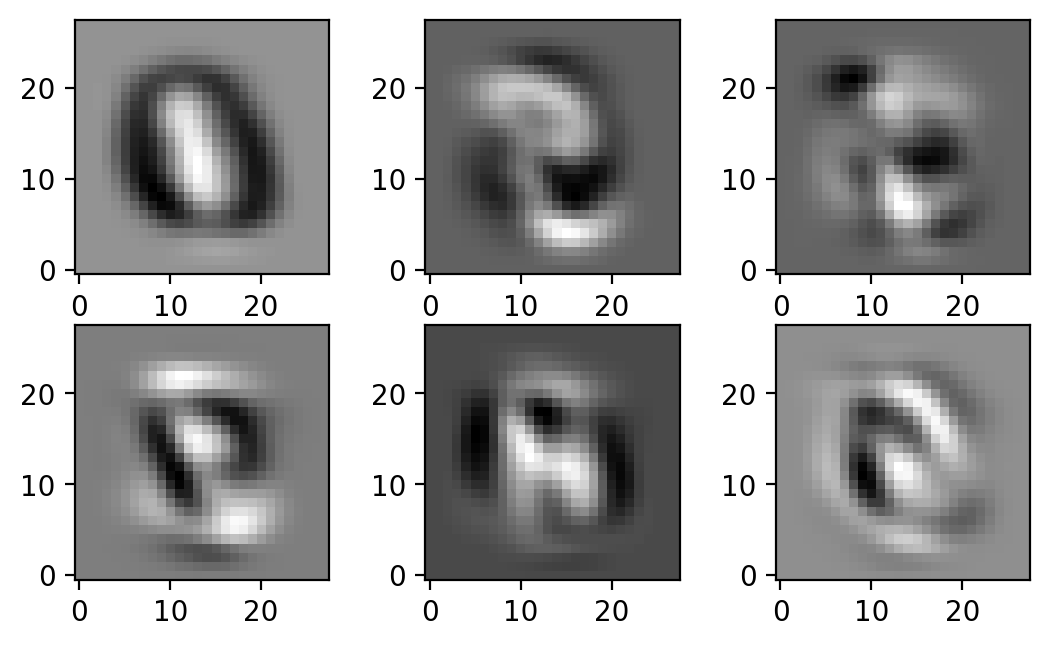

In [7]:
#the following code is taken directly from [1]

print("A few of the PCA components are shown below:")
fig,ax=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,(i+j*3)],[28,28]), origin='lower',cmap='binary',interpolation='nearest')
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)  #Adjust the space between the subplots so there isn't acres of whitespace

### Part 3: Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITOUT RETRAINING THE NETWORK*

Decompose MNIST test data into its PCA components:

In [8]:
#the following code is adapted from [1]

X_tst=np.reshape(test_images,(10000,784)) #reshape test imgs to 10000 of 784 individual pixels
mu_tst=np.mean(X_tst,axis=0)  #calculate mean
x_tst=X_tst-mu_tst #to make the mean of x = 0

rho_tst=np.cov(x_tst,rowvar=False) # Make the covaraince matrix by np.cov
vals_tst,vecs_tst=linalg.eigh(rho_tst) #Get the eigenvalues and vectors from the covariance matrix

#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs_tst))
print("vals.shape:",np.shape(vals_tst))
vecs_tst=np.flip(vecs_tst) #eigenvectors
vals_tst=np.flip(vals_tst) #eigenvalues 

vecs.shape: (784, 784)
vals.shape: (784,)


Plot 'Fraction of Explained Variance' against 'PCA index'. It shows you how much each principle component contributes to the total variance of the image (ie quality of image):

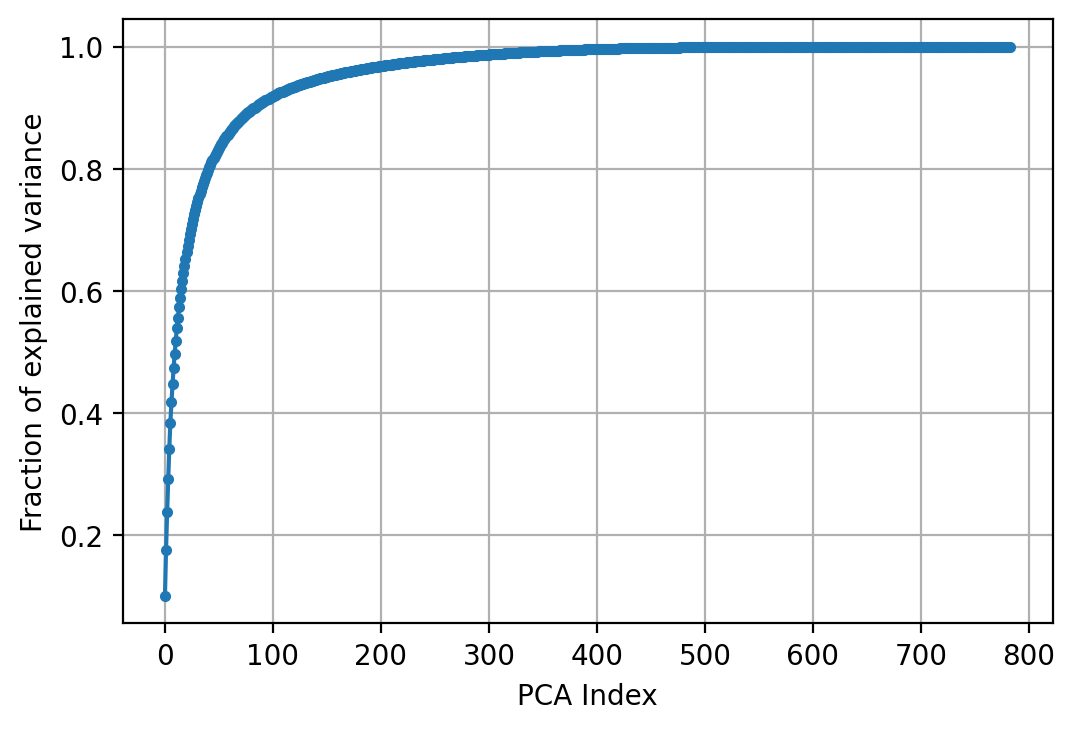

In [9]:
#the following code is adapted from [1]
fig,ax=plt.subplots()
cumsum_tst=np.cumsum(vals_tst.real) #cumulative sum of eigenvalues
cdf_tst=cumsum_tst/cumsum_tst[-1] #in units of final eigenvalue
index_tst=np.arange((np.shape(vals_tst)[0])) #index range

ax.plot(index_tst,cdf_tst,"-o", markersize=3)
ax.set_xlabel("PCA Index")
ax.set_ylabel("Fraction of explained variance")
ax.grid()

From the plot, we can see that 0-150 PCA index contributes to ~95% of the variance. Therefore, using the first 100 components should give good test accuracy. Therefore, for Part 3, 4 and 5, I will be using 150 PCA as N to plot Test Accuracy vs N. This can also be done using all 784 components but this will take more time, use more computing power and will only be very slightly more accurate. 

In [20]:
#using 150:
P_tst=np.dot(x_tst,vecs_tst) #dot product of test image pixel values and eigenvectors
newImage_tst=(np.dot(P_tst[:,0:150],vecs_tst.T[0:150,:]))+mu #new testing data set

#reshape to original:
test_n = np.reshape(newImage_tst, (10000, 28, 28))
                      
#we can see how this new test dataset is the same shape as the original MNIST test data
print("New test images shape:", np.shape(test_n))
print("Original MNIST test images shape:",np.shape(test_images))

New test images shape: (10000, 28, 28)
Original MNIST test images shape: (10000, 28, 28)


Make plot of N vs Test Accuracy for the each of the N-best PCA components used:

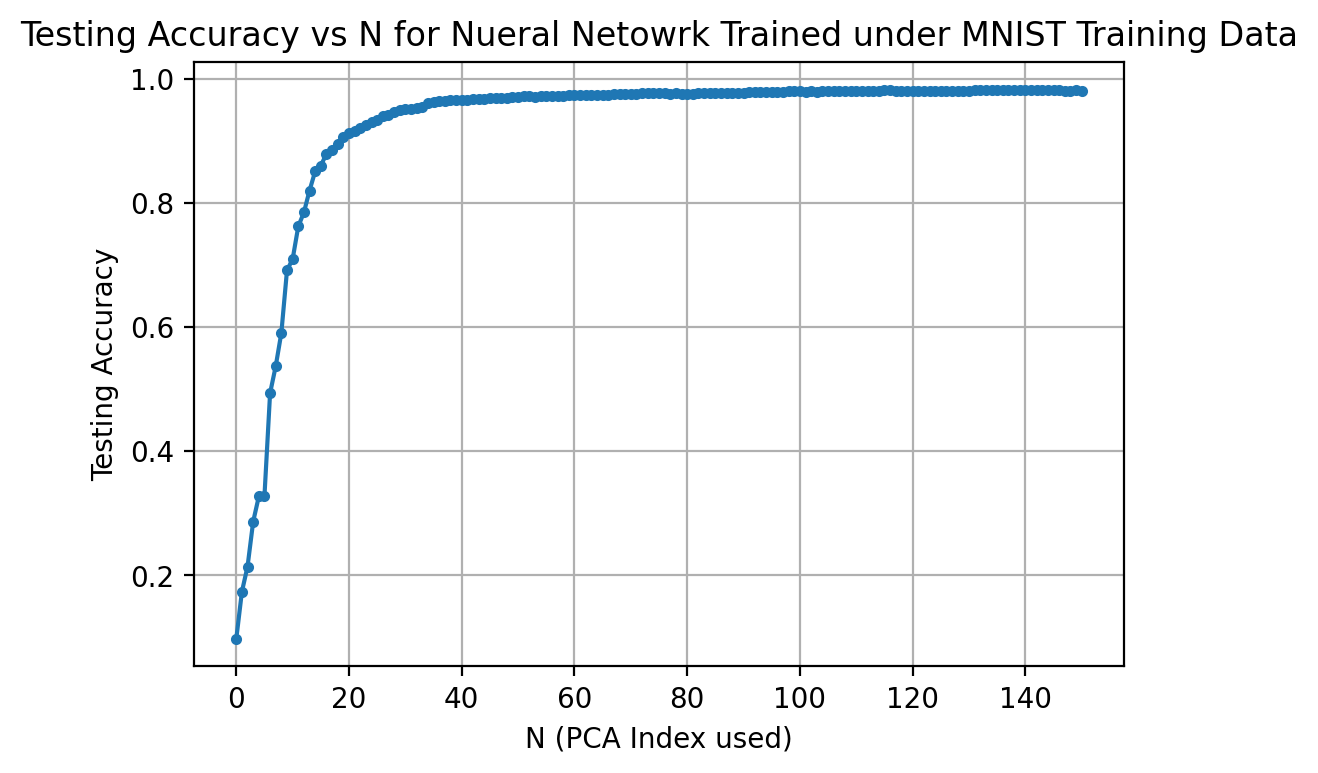

In [11]:
index=150 #max index we will use

test_acc_n = [] #initialise empty array of test accuracies
for i in range(index+1): #generate new test data and run nn with all index up to 150
    
    newImage_tst=(np.dot(P_tst[:,0:i],vecs_tst.T[0:i,:]))+mu #new test images
    test_n = np.reshape(newImage_tst, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2) #run nn
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)


#plot:
fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N for Nueral Netowrk Trained under MNIST Training Data")
ax.grid()

#### Comments:

It is clear from the plot that the higher N is used, the greater the test accuracy. However, there is a point wher the test accuracy doesnt increase much more. Here, that point is ~N=40 where ~95% accracy is achieved and is sufficient.

### Part 4 & 5: Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1) and Repeat step 3 (using your new neural network from 4)

Generate new training images using he 100-best PCA components:

In [19]:
#using the 100 best:
P_train=np.dot(x,vecs) #dot product of test image pixel values and eigenvectors
newImage100=(np.dot(P_train[:,0:100],vecs.T[0:100,:]))+mu #new training data set (N=100)

#reshape to original:
train100 = np.reshape(newImage100, (60000, 28, 28))
                      
#we can see how this new test dataset is the same shape as the original MNIST training data
print("New training images shape:", np.shape(train100))
print("Original MNIST training images shape:",np.shape(train_images))

New training images shape: (60000, 28, 28)
Original MNIST training images shape: (60000, 28, 28)


Train Nueral Network using the new training images:

In [13]:
history=model.fit(train100, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9828
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0241 - accuracy: 0.9918
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9979
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9980

Run the newly trained nueral network with the test images from before:

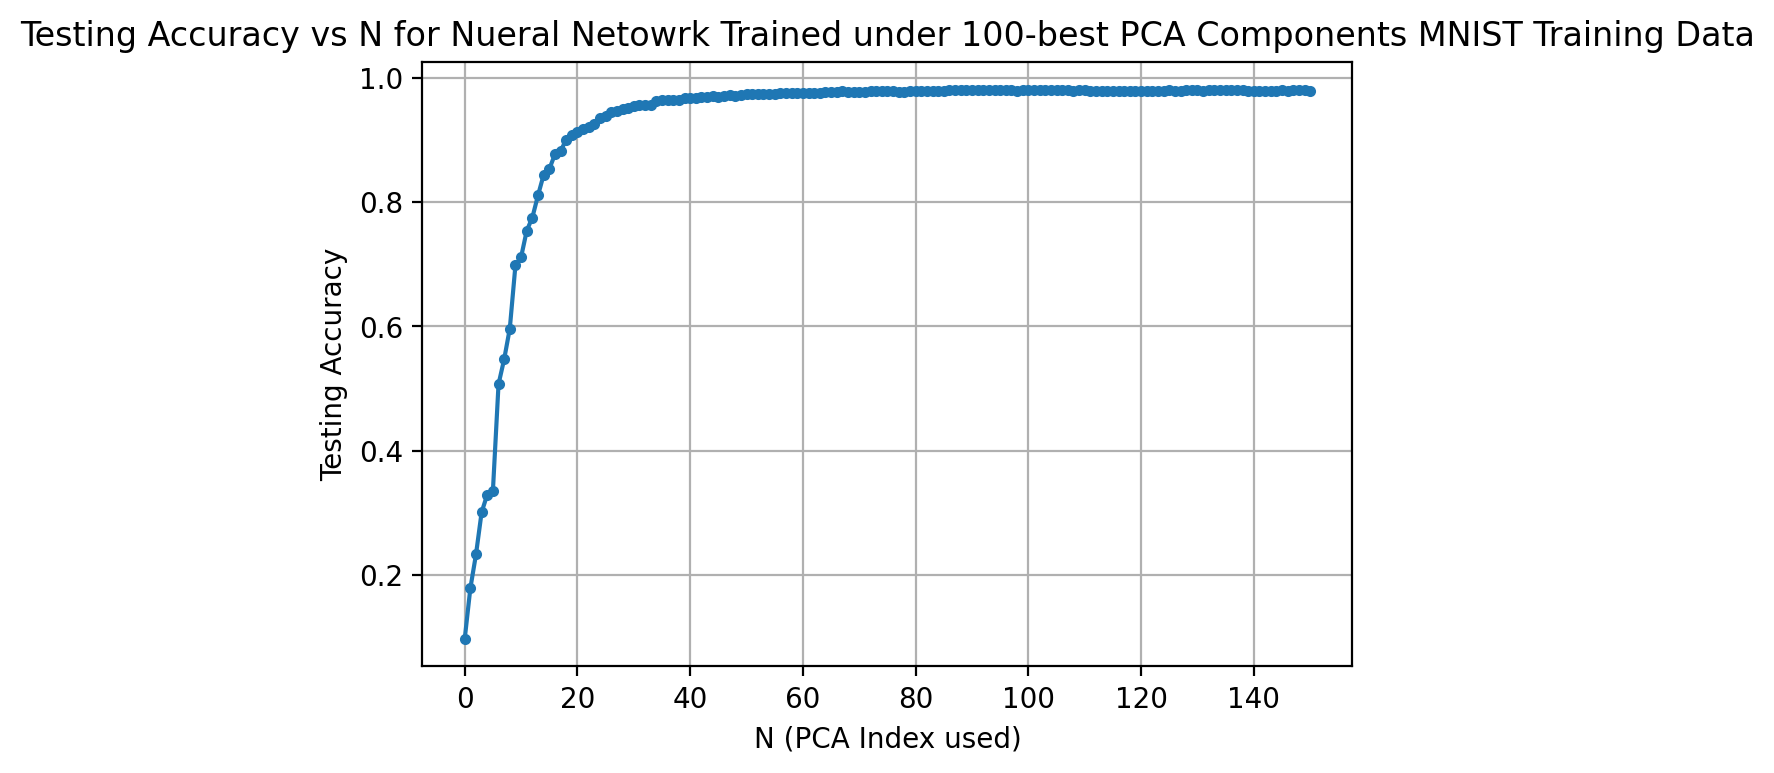

In [14]:
test_acc_n = []
for i in range(index+1):
    newImage_tst=(np.dot(P_tst[:,0:i],vecs_tst.T[0:i,:]))+mu
    test_n = np.reshape(newImage_tst, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2)
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)

fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N for Nueral Netowrk Trained under 100-best PCA Components MNIST Training Data")
ax.grid()

### Part 6: Finally repeat steps 4 and 5 using a network trained with the best 20 components

Generate new training images using he 20-best PCA components:

In [18]:
#using the first 20:
newImage20=(np.dot(P_train[:,0:20],vecs.T[0:20,:]))+mu #new training data set

#reshape to original:
train20 = np.reshape(newImage20, (60000, 28, 28))
                      
#we can see how this new test dataset is the same shape as the original MNIST training data
print("New training images shape:", np.shape(train20))
print("Original MNIST training images shape:",np.shape(train_images))

New training images shape: (60000, 28, 28)
Original MNIST training images shape: (60000, 28, 28)


Train Nueral Network using the new training images:

In [16]:
history=model.fit(train20, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2014 - accuracy: 0.9498
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9642
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9675
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9709
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9720
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9737
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9748
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9758
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9766
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9768

Run the newly trained nueral network with the test images from before:

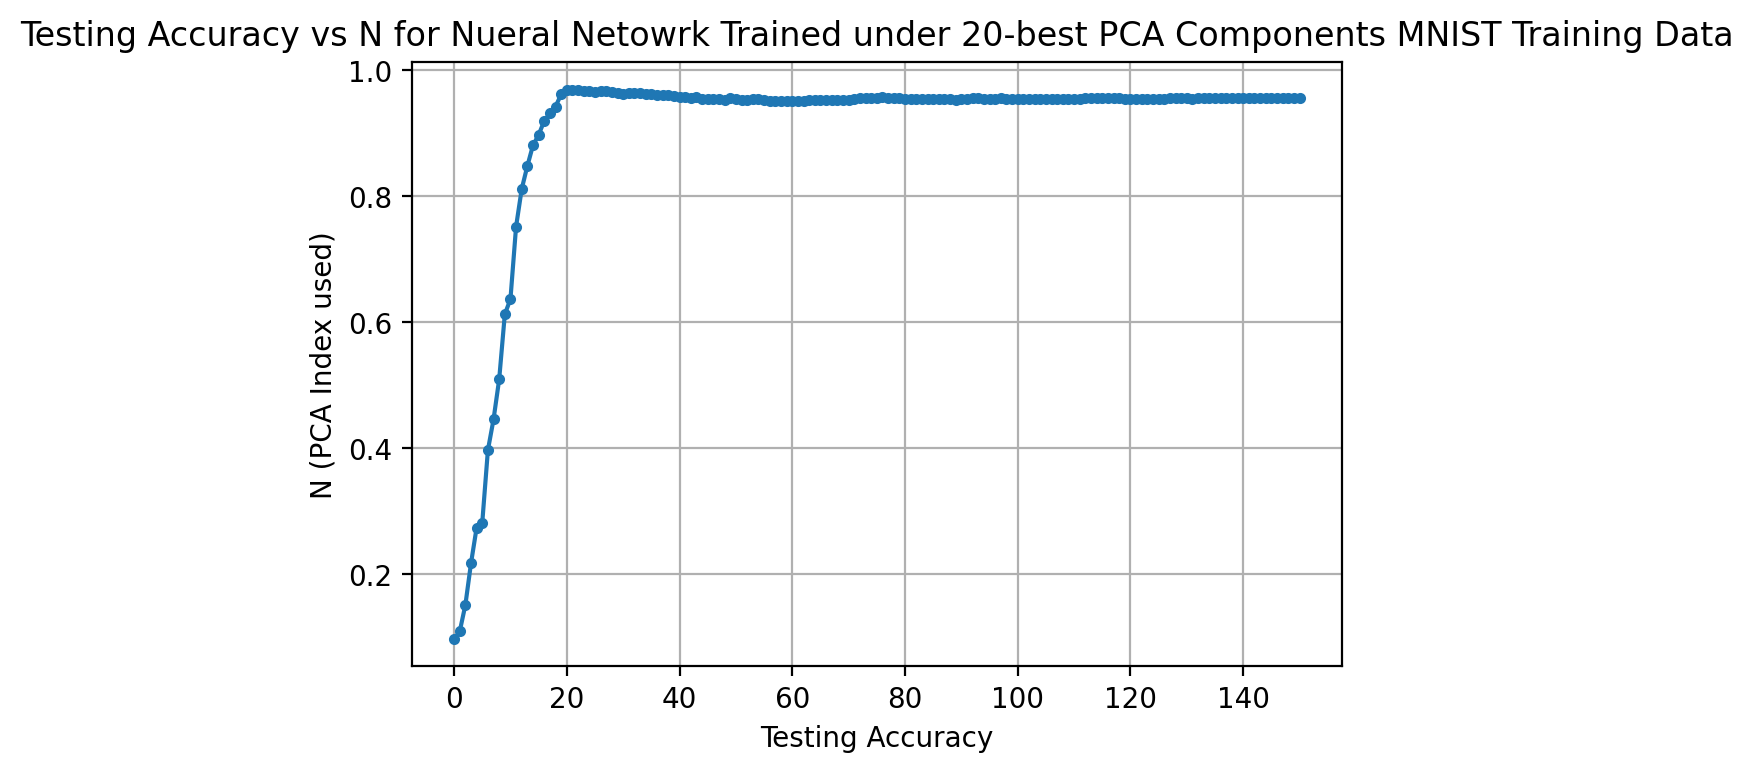

In [33]:
test_acc_n = []
for i in range(index+1):
    newImage_tst=(np.dot(P_tst[:,0:i],vecs_tst.T[0:i,:]))+mu
    test_n = np.reshape(newImage_tst, (10000, 28, 28)) #reshape
    
    test_loss, test_acc = model.evaluate(test_n,  test_labels, verbose=2)
    test_acc_n.append(test_acc)
    
    clear_output(wait=True)

fig,ax=plt.subplots()
ax.plot(range(index+1),test_acc_n,"-o", markersize=3)
ax.set_ylabel("Testing Accuracy")
ax.set_xlabel("N (PCA Index used)")
ax.set_title("Testing Accuracy vs N for Nueral Netowrk Trained under 20-best PCA Components MNIST Training Data")
ax.grid()

### Conclusion:

Using 100-best PCA components gives virtually the same result as using the unmodified MNIST training data. This shows that our PCA training data mimics the MNIST training data very well. Therefore, Principle Component Analysis (PCA) is a very accurate technique in machine learning.

Using 20-best PCA components gives the worst result because it decreases in accuracy around the 20 PCA component (for the TEST data, not training data). So, using less PCA components means that accuracy will decrease. Therefore using more PCA compenents for the training dataset will increase testing accuracy. However, from our discussion of the very first plot in this notebook, there is a point where increasing the PCA components used further, will have a negligible improvement in the testing accuracy.

# BIG MISTAKE:

### Didn't make, train and run a NEW nueral network for each part. Because of this the same NN used was ran over the wrong data from the beginning. 

# Bibliography:

[1]Nichol. R 2021. "Week5_PCA". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=6793 [accessed 9th November 2021] 